<a href="https://colab.research.google.com/github/kim-slava/komp_vision/blob/main/komp_vision_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  ## Нормализуем значения яркости, что бы вписать их в диапазон 0..1
print(f"Количество изображений обучающих: {len(x_train)}, тестовых {len(x_test)}, размер изображений {x_train.shape[1]}x{x_train.shape[2]}")

11490434/11490434 [==============================] - 2s 0us/step
Количество изображений обучающих: 60000, тестовых 10000, размер изображений 28x28


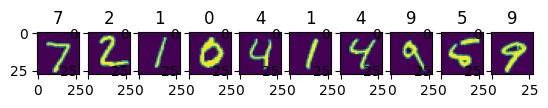

In [ ]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_test[i])
  plt.title(y_test[i])
plt.show()

In [ ]:
model_2= tf.keras.models.Sequential([
  # Cверточный слой: размер ядра 3*3, 1 канал на входе, 64 на выходе.
  # Форма тензора на входе (,28,28,1) трансформируется в (26,26,32)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(28, 28, 1), activation='relu'),

  # Слой max-выборки: размер ядра 2*2, используется для уменьшения объема данных
  # Форма тензора на входе (,26,26,32) трансформируется в (13,13,32)
  tf.keras.layers.MaxPool2D((2,2)),

  # Заканчиваем сеть персептроном
  # На входе (,13,13,32) -> (,5408)
  tf.keras.layers.Flatten(),
  # На входе (,5408) -> (,128)
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # На входе (,128) -> (,10)
  tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               802944    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
x_train_4d = x_train.reshape(-1, 28, 28, 1),
x_test_4d = x_test.reshape(-1, 28, 28, 1)
model_2.fit(x_train_4d, y_train, epochs=5)
model_2.evaluate(x_test_4d, y_test)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1612 - accuracy: 0.9512
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0595 - accuracy: 0.9816
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0415 - accuracy: 0.9867
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0301 - accuracy: 0.9907
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0442 - accuracy: 0.9868


[0.04418357089161873, 0.9868000149726868]

In [ ]:
model_3= tf.keras.models.Sequential([
  # Cверточный слой: размер ядра 3*3, 1 канал на входе, 64 на выходе.
  # Форма тензора на входе (,28,28,1) трансформируется в (26,26,32)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(28, 28, 1), activation='relu'),
  # Слой max-выборки: размер ядра 2*2
  # Форма тензора на входе (,26,26,32) трансформируется в (13,13,32)
  tf.keras.layers.MaxPool2D((2,2)),

  # Второй сверточный слой
  # Форма тензора на входе (,13,13,32) -> (11,11,64)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  # max-выборка: (,11,11,64) -> (5,5,64)
  tf.keras.layers.MaxPool2D((2,2)),

  # Заканчиваем сеть персептроном
  # На входе (,5,5,32) -> (,800)
  tf.keras.layers.Flatten(),
  # На входе (,5408) -> (,128)
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # На входе (,128) -> (,10)
  tf.keras.layers.Dense(10, activation='softmax')

])

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1568)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [ ]:
model_3.fit(x_train_4d, y_train, epochs=5)
model_3.evaluate(x_test_4d, y_test)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1564 - accuracy: 0.9510
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0509 - accuracy: 0.9844
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0359 - accuracy: 0.9885
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0273 - accuracy: 0.9913
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0256 - accuracy: 0.9912


[0.025640979409217834, 0.9911999702453613]

In [ ]:
model_4= tf.keras.models.Sequential([
  # Cверточный слой: размер ядра 3*3, 1 канал на входе, 64 на выходе.
  # Форма тензора на входе (,28,28,1) трансформируется в (,28,28,32)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(28, 28, 1), activation='relu'),
  # Слой max-выборки: размер ядра 2*2
  # Форма тензора на входе (,28,28,32) трансформируется в (14,14,32)
  tf.keras.layers.MaxPool2D((2,2)),

  # Второй сверточный слой
  # Форма тензора на входе (,14,14,32) -> (14,14,64)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  # max-выборка: (,14,14,64) -> (7,7,64)
  tf.keras.layers.MaxPool2D((2,2)),

  # Третий сверточный слой
  # Форма тензора на входе (,7,7,32) -> (7,7,64)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  # max-выборка: (7,7,64) -> (3,3,64)
  tf.keras.layers.MaxPool2D((2,2)),


  # Заканчиваем сеть персептроном
  # На входе (,5,5,32) -> (,800)
  tf.keras.layers.Flatten(),
  # На входе (,5408) -> (,128)
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # На входе (,128) -> (,10)
  tf.keras.layers.Dense(10, activation='softmax')

])

model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 3, 3, 32)        

In [ ]:
model_4.fit(x_train_4d, y_train, epochs=5)
model_4.evaluate(x_test_4d, y_test)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1963 - accuracy: 0.9389
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0599 - accuracy: 0.9813
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0446 - accuracy: 0.9871
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0352 - accuracy: 0.9888
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0256 - accuracy: 0.9915


[0.02562587894499302, 0.9915000200271606]

In [ ]:
model_4.fit(x_train_4d, y_train, epochs=5)
model_4.evaluate(x_test_4d, y_test)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0264 - accuracy: 0.9918
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0207 - accuracy: 0.9931
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0182 - accuracy: 0.9939
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0169 - accuracy: 0.9948
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.9918


[0.0282262172549963, 0.9918000102043152]

In [ ]:
model_5= tf.keras.models.Sequential([
  # Cверточный слой: размер ядра 3*3, 1 канал на входе, 64 на выходе.
  # Форма тензора на входе (,28,28,1) трансформируется в (,28,28,32)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(28, 28, 1), activation='relu'),
  # Слой max-выборки: размер ядра 2*2
  # Форма тензора на входе (,28,28,32) трансформируется в (14,14,32)
  tf.keras.layers.MaxPool2D((2,2)),

  # Второй сверточный слой
  # Форма тензора на входе (,14,14,32) -> (14,14,64)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  # max-выборка: (,14,14,64) -> (7,7,64)
  tf.keras.layers.MaxPool2D((2,2)),

  # Третий сверточный слой
  # Форма тензора на входе (,7,7,32) -> (7,7,64)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  # max-выборка: (7,7,64) -> (3,3,64)
  tf.keras.layers.MaxPool2D((2,2)),

  # Четвертый сверточный слой
  # Форма тензора на входе (,7,7,32) -> (7,7,64)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  # max-выборка: (7,7,64) -> (3,3,64)
  tf.keras.layers.MaxPool2D((2,2)),


  # Заканчиваем сеть персептроном
  # На входе (,5,5,32) -> (,800)
  tf.keras.layers.Flatten(),
  # На входе (,5408) -> (,128)
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # На входе (,128) -> (,10)
  tf.keras.layers.Dense(10, activation='softmax')

])

model_5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 3, 3, 32)       

In [ ]:
model_5.fit(x_train_4d, y_train, epochs=7)
model_5.evaluate(x_test_4d, y_test)

Epoch 1/7
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2294 - accuracy: 0.9267
Epoch 2/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0701 - accuracy: 0.9792
Epoch 3/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0498 - accuracy: 0.9850
Epoch 4/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0391 - accuracy: 0.9881
Epoch 5/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0325 - accuracy: 0.9897
Epoch 6/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0269 - accuracy: 0.9917
Epoch 7/7
313/313 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9895


[0.034488946199417114, 0.9894999861717224]

In [ ]:
acc_train = model_5.evaluate(x_train_4d, y_train)[1]
acc_test = model_5.evaluate(x_test_4d, y_test)[1]
print(f"Accuracy на обучающей выборке {acc_train:.4}, на тестовой {acc_test:.4}")

In [ ]:
model_6= tf.keras.models.Sequential([
  # Cверточный слой: размер ядра 3*3, 1 канал на входе, 64 на выходе.
  # Форма тензора на входе (,28,28,1) трансформируется в (,28,28,32)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(28, 28, 1), activation='relu'),
  # Слой max-выборки: размер ядра 2*2
  # Форма тензора на входе (,28,28,32) трансформируется в (14,14,32)
  tf.keras.layers.MaxPool2D((2,2)),

  # Второй сверточный слой
  # Форма тензора на входе (,14,14,32) -> (14,14,64)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  # max-выборка: (,14,14,64) -> (7,7,64)
  tf.keras.layers.MaxPool2D((2,2)),

  # Третий сверточный слой
  # Форма тензора на входе (,7,7,32) -> (7,7,64)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  # max-выборка: (7,7,64) -> (3,3,64)
  tf.keras.layers.MaxPool2D((2,2)),

  # Четвертый сверточный слой
  # Форма тензора на входе (,7,7,32) -> (7,7,64)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  # max-выборка: (7,7,64) -> (3,3,64)
  tf.keras.layers.MaxPool2D((2,2)),


  # Заканчиваем сеть персептроном
  # На входе (,5,5,32) -> (,800)
  tf.keras.layers.Flatten(),
  # На входе (,5408) -> (,128)
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # На входе (,128) -> (,10)
  tf.keras.layers.Dense(10, activation='softmax')

])

model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

In [ ]:
x_train_4d = x_train.reshape(-1, 28, 28, 1),
x_test_4d = x_test.reshape(-1, 28, 28, 1)
model_6.fit(x_train_4d, y_train, epochs=7)
model_6.evaluate(x_test_4d, y_test)

Epoch 1/7
1875/1875 [==============================] - 20s 5ms/step - loss: 0.2276 - accuracy: 0.9269
Epoch 2/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0627 - accuracy: 0.9812
Epoch 3/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0459 - accuracy: 0.9857
Epoch 4/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0369 - accuracy: 0.9884
Epoch 5/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0318 - accuracy: 0.9902
Epoch 6/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0276 - accuracy: 0.9916
Epoch 7/7
313/313 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9897


[0.03558221086859703, 0.9897000193595886]

In [ ]:
acc_train = model_6.evaluate(x_train_4d, y_train)[1]
acc_test = model_6.evaluate(x_test_4d, y_test)[1]
print(f"Accuracy на обучающей выборке {acc_train:.4}, на тестовой {acc_test:.4}")

# **ОБУЧЕНИЕ НА ДРУГОМ ДАТАСЕТЕ**


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  ## Нормализуем значения яркости, что бы вписать их в диапазон 0..1
print(f"Количество изображений обучающих: {len(x_train)}, тестовых {len(x_test)}, размер изображений {x_train.shape[1]}x{x_train.shape[2]}")

Количество изображений обучающих: 60000, тестовых 10000, размер изображений 28x28


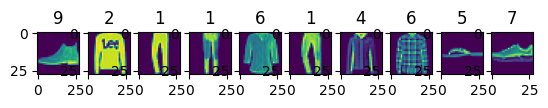

In [ ]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_test[i])
  plt.title(y_test[i])
plt.show()

In [ ]:
x_train_4d = x_train.reshape(-1, 28, 28, 1),
x_test_4d = x_test.reshape(-1, 28, 28, 1)

In [ ]:
model_fashion= tf.keras.models.Sequential([
  # Cверточный слой: размер ядра 3*3, 1 канал на входе, 64 на выходе.
  # Форма тензора на входе (,28,28,1) трансформируется в (26,26,32)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(28, 28, 1), activation='relu'),
  # Слой max-выборки: размер ядра 2*2
  # Форма тензора на входе (,26,26,32) трансформируется в (13,13,32)
  tf.keras.layers.MaxPool2D((2,2)),

  # Второй сверточный слой
  # Форма тензора на входе (,13,13,32) -> (11,11,64)
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  # max-выборка: (,11,11,64) -> (5,5,64)
  tf.keras.layers.MaxPool2D((2,2)),

  # Заканчиваем сеть персептроном
  # На входе (,5,5,32) -> (,800)
  tf.keras.layers.Flatten(),
  # На входе (,5408) -> (,128)
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # На входе (,128) -> (,10)
  tf.keras.layers.Dense(10, activation='softmax')

])

model_fashion.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fashion.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 1568)              0         
                                                                 
 dense_28 (Dense)            (None, 128)             

In [ ]:
model_fashion.fit(x_train_4d, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1822 - accuracy: 0.9329
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1676 - accuracy: 0.9369
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1526 - accuracy: 0.9424
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1374 - accuracy: 0.9491
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1255 - accuracy: 0.9521
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1165 - accuracy: 0.9558
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1077 - accuracy: 0.9584
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1000 - accuracy: 0.9622
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0927 - accuracy: 0.9648
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.085

In [ ]:
acc_train = model_fashion.evaluate(x_train_4d, y_train)[1]
acc_test = model_fashion.evaluate(x_test_4d, y_test)[1]
print(f"Accuracy на обучающей выборке {acc_train:.4}, на тестовой {acc_test:.4}")